In [2]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

***

# TweetsCov19
## KDE-Plot

****

In [2]:
#Die gepostete Tweets von den Benutzer mit bekannten moderaten Meinungen wird gelesen.
pfad_tsv1 = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_sample/df_polarisierungen/tweetscov19_user_tweets_moderacy_all.tsv'

df_tweetscov19 = pd.read_csv(pfad_tsv1, sep='\t', error_bad_lines=False, names=['Tweet_Id', "Username", 'num_posted', 'num_del', 'Deletion_ratio', 'Reputation', 'Urls_num', 'neg', 'pos', 'pol_num', 'moderacy', 'is_deleted'])
pd.options.display.max_columns = None
print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (1400203, 12)


,Tweet_Id,Username,num_posted,num_del,Deletion_ratio,Reputation,Urls_num,neg,pos,pol_num,moderacy,is_deleted
0,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,24,5,0.2083,0.5722,7,-1,0,1,-1.0000,False
1,1179408833728466944,7966d5716c1c4f33591b17755184e3d6,24,5,0.2083,0.5722,7,-1,0,1,-1.0000,True
2,1182683474827739136,7966d5716c1c4f33591b17755184e3d6,24,5,0.2083,0.5722,7,-1,0,1,-1.0000,False
3,1184746364158271488,7966d5716c1c4f33591b17755184e3d6,24,5,0.2083,0.5722,7,-1,0,1,-1.0000,False
4,1185117204628623360,7966d5716c1c4f33591b17755184e3d6,24,5,0.2083,0.5722,7,-1,0,1,-1.0000,True


In [3]:
#Die gelöschten und nicht gelöschten Tweets trennen.
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [4]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['moderacy']>0]
print('Alle hard. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['moderacy']<0]
print('Alle mod. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 96513
Alle hard. Users in gesammten Tweets: 24804
Alle mod. Users in gesammten Tweets: 71709


In [5]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['moderacy']>0]
print('Alle hard. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['moderacy']<0]
print('Alle mod. Users in  gelöschten Tweets:', df.Username.unique().size)

Alle Users: 24711
Alle hard. Users in gelöschten Tweets: 8129
Alle mod. Users in  gelöschten Tweets: 16582


In [6]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['moderacy']>0]
print('Alle hard. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['moderacy']<0]
print('Alle mod. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 80941
Alle hard. Users in nicht gelöschten Tweets: 18574
Alle mod. Users in nicht gelöschten Tweets: 62367


In [5]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
def plot_kdeplot(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/kde/'+name+'.pdf')


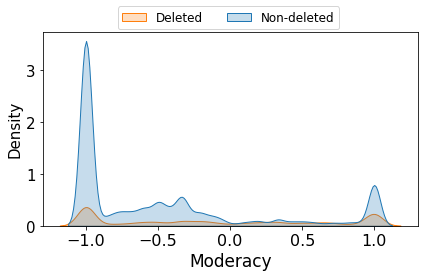

In [6]:
df = df_tweetscov19[['is_deleted', 'moderacy']]
plot_kdeplot(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetscov19_moderacy_all_tweets')

In [28]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
#Englische Labels
def plot_kdeplot_de(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Dichte', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Gelöscht','Nicht Gelöscht'], bbox_to_anchor=(0.18, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/kde/de/'+name+'.pdf')


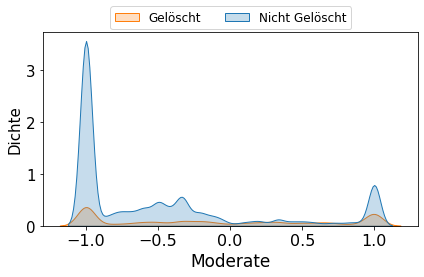

In [29]:
df = df_tweetscov19[['is_deleted', 'moderacy']]
plot_kdeplot_de(df, 'is_deleted','moderacy' ,'Moderate' ,'TweetsCov19', 'kdeplot_tweetscov19_moderacy_all_tweets')

***

# Histogram

***

In [6]:
#Die Anzahl der Hardliner und Moderaten entlang der moderate Achse wird dargestellt.
def plot_histogram_en(df, titel):
    
    fig, ax = plt.subplots()
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderate')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardline')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Moderacy', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/urls/'+titel+'.pdf')

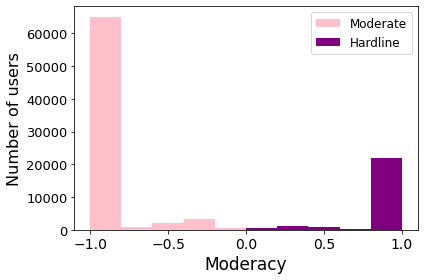

In [7]:
#Alle Tweets
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram_en(df['moderacy'],'hist_tweetsCov19_URLs_moderacy_pol')

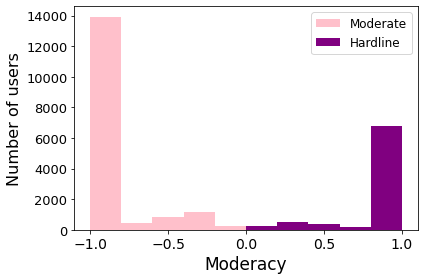

In [8]:
#Gelöschte Tweets
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram_en(df['moderacy'],'hist_tweetsCov19_del_URLs_moderacy_pol')

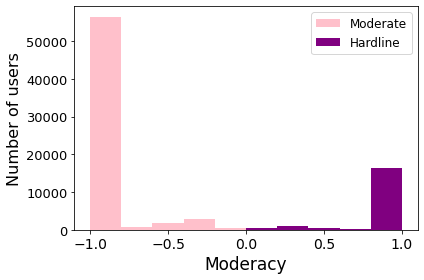

In [9]:
#Nicht gelöschte Tweets
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram_en(df['moderacy'],'hist_tweetsCov19_undel_URLs_moderacy_pol')

In [55]:
#Die Anzahl der Hardliner und Moderaten entlang der moderate Achse wird dargestellt.
#Englische Labels
def plot_histogram_de(df, titel):
    
    fig, ax = plt.subplots()

    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderat')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardliner')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Anzahl der Benutzer', fontsize=16)
    ax.set_xlabel(xlabel='Moderate', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/de/'+titel+'.pdf')

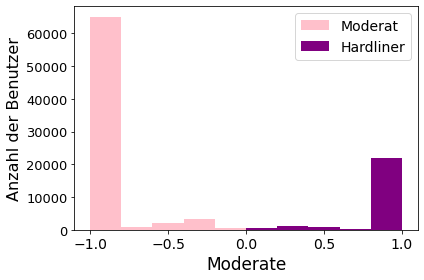

In [56]:
#Alle Tweets
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram_de(df['moderacy'],'hist_tweetsCov19_URLs_moderacy_pol')

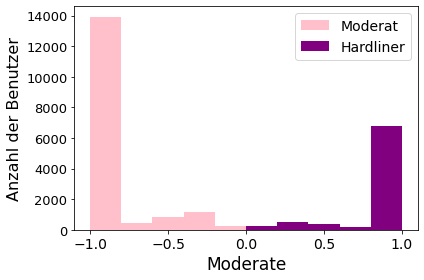

In [57]:
#Gelöschte Tweets
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram_de(df['moderacy'],'hist_tweetsCov19_del_URLs_moderacy_pol')

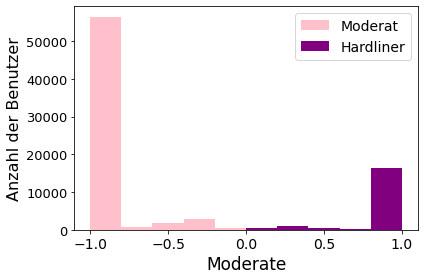

In [58]:
#Nicht gelöschte Tweets
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram_de(df['moderacy'],'hist_tweetsCov19_undel_URLs_moderacy_pol')

***

# Hexabin
### Reputation-Polarisierung

***

In [41]:
#Die Beziehung zwischen der Reputation der Benutzer und moderate Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten und gelöschten Tweets geachtet. 
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/all_tweets/'+titel+'.pdf')
    #plt.show()

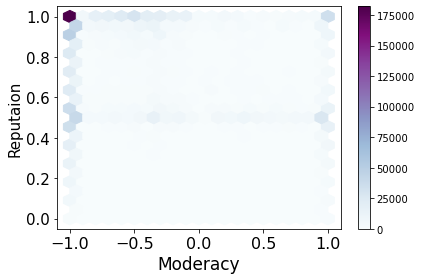

In [42]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_moderacy_reputation_all')

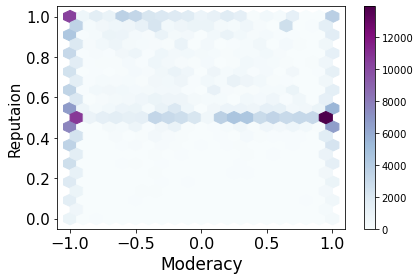

In [43]:
#Gelöschte Tweets
plot_hexbin_reputaion(df_del, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_del_moderacy_reputation_all')

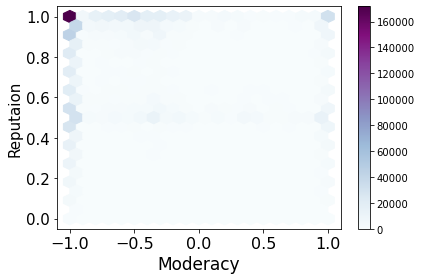

In [44]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion(df_undel, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_undel_moderacy_reputation_all')

In [45]:
#Die Beziehung zwischen der Reputation der Benutzer und moderate Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten und gelöschten Tweets geachtet. 
#Englische Labels
def plot_hexbin_reputaion_de(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/de/'+titel+'.pdf')
    #plt.show()

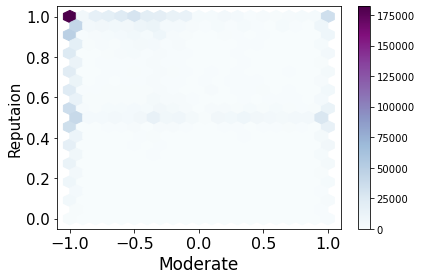

In [46]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion_de(df, 'is_deleted','moderacy', 'Moderate', 'BuPu', 'Hexabinplot_tweetscov19_moderacy_reputation_all')

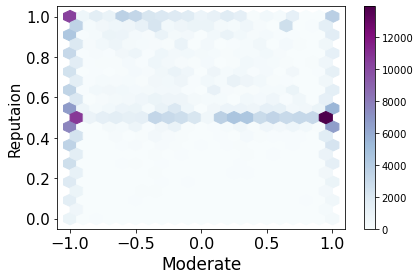

In [47]:
#Gelöschte Tweets
plot_hexbin_reputaion_de(df_del, 'is_deleted','moderacy', 'Moderate', 'BuPu', 'Hexabinplot_tweetscov19_del_moderacy_reputation_all')

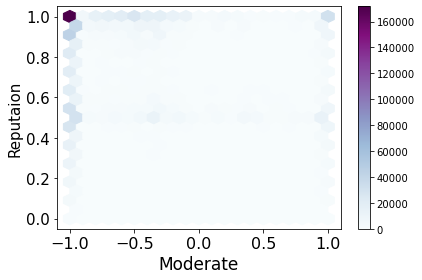

In [48]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion_de(df_undel, 'is_deleted','moderacy', 'Moderate', 'BuPu', 'Hexabinplot_tweetscov19_undel_moderacy_reputation_all')

***

### Löschungsquote-Polarisierung

***

In [27]:
#Die Beziehung zwischen der Löschungsquote der Benutzer und moderate Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der gelöschten Tweets geachtet. 
#Englische Labels
def plot_hexbin_deletion_ratio(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Deletion_ratio",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Deletion ratio', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/deletion_ratio/'+titel+'.pdf')
    #plt.show()

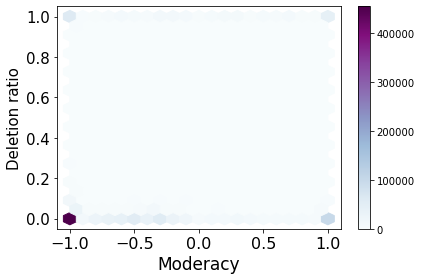

In [28]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'moderacy', 'Deletion_ratio']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_deletion_ratio(df, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_moderacy_deletion_ratio_all')

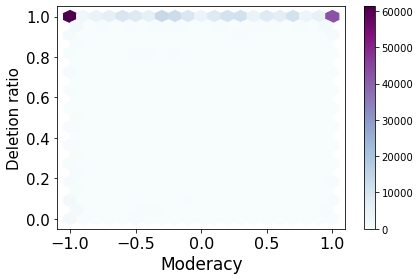

In [29]:
#Gelöschte Tweets
plot_hexbin_deletion_ratio(df_del, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_del_moderacy_deletion_ratio_all')

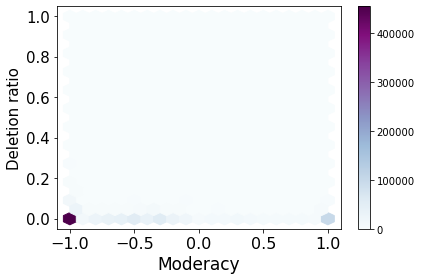

In [30]:
#Nicht gelöschte Tweets
plot_hexbin_deletion_ratio(df_undel, 'is_deleted','moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetscov19_undel_moderacy_deletion_ratio_all')

***

# TweetKB

***

## KDE-Plot

In [3]:
#Die gepostete Tweets von den Benutzern mit bekannten moderaten Meinungen lesen.
pfad_tsv1 = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/df_polarisierungen/tweetskb_user_tweets_moderacy_all.tsv'

df_tweetskb = pd.read_csv(pfad_tsv1, sep='\t', error_bad_lines=False, names=['Tweet_Id', "Username", 'num_posted', 'num_del', 'Deletion_ratio', 'Reputation', 'Urls_num', 'neg', 'pos', 'pol_num', 'moderacy', 'is_deleted'])
pd.options.display.max_columns = None
print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (310296, 12)


,Tweet_Id,Username,num_posted,num_del,Deletion_ratio,Reputation,Urls_num,neg,pos,pol_num,moderacy,is_deleted
0,1178792055822311426,Londonscot3,3,0,0.0000,0.3675,1,-1,0,1,-1.0000,False
1,1180815036824117250,Londonscot3,3,0,0.0000,0.3675,1,-1,0,1,-1.0000,False
2,1221572333439197184,Londonscot3,3,0,0.0000,0.3675,1,-1,0,1,-1.0000,False
3,1178792079155179520,Mauerback,11,0,0.0000,0.9466,5,-1,0,1,-1.0000,False
4,1202256426858668032,Mauerback,11,0,0.0000,0.9466,5,-1,0,1,-1.0000,False


In [4]:
#Die gelöschten und nicht gelöschten Tweets trennen.
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [5]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['moderacy']>0]
print('Alle hard. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['moderacy']<0]
print('Alle mod. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 34352
Alle hard. Users in gesammten Tweets: 9040
Alle mod. Users in gesammten Tweets: 25312


In [6]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['moderacy']>0]
print('Alle hard. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['moderacy']<0]
print('Alle mod. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 9128
Alle hard. Users in gelöschten Tweets: 3398
Alle mod. Users in gelöschten Tweets: 5730


In [7]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['moderacy']>0]
print('Alle hard. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['moderacy']<0]
print('Alle mod. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 27496
Alle hard. Users in nicht gelöschten Tweets: 6179
Alle mod. Users in nicht gelöschten Tweets: 21317


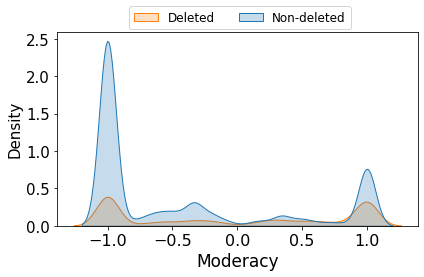

In [30]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.

df = df_tweetskb[['is_deleted', 'moderacy']]
plot_kdeplot(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetskb_moderacy_all_tweets')

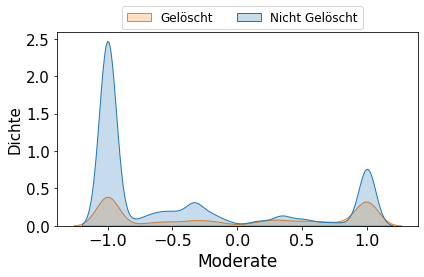

In [31]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
#Englische Labels
df = df_tweetskb[['is_deleted', 'moderacy']]
plot_kdeplot_de(df, 'is_deleted','moderacy' ,'Moderate' ,'TweetsCov19', 'kdeplot_tweetskb_moderacy_all_tweets')

***

# Histogram

***

In [14]:
#Die Anzahl der Hardliner und Moderaten entlang der moderate Achse wird dargestellt.
def plot_histogram_kb_en(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderate')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardline')
   
          
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Moderacy', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/urls/'+titel+'.pdf')

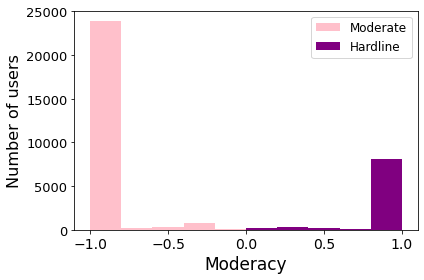

In [15]:
#Alle Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['moderacy'],'hist_tweetskb_URLs_moderacy_pol')

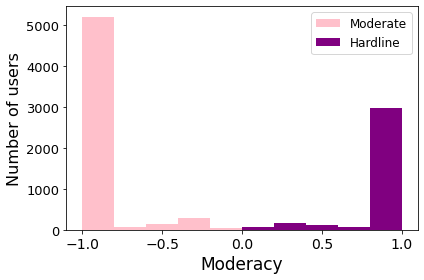

In [16]:
#Gelöschte Tweets
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['moderacy'],'hist_tweetskb_del_URLs_moderacy_pol')

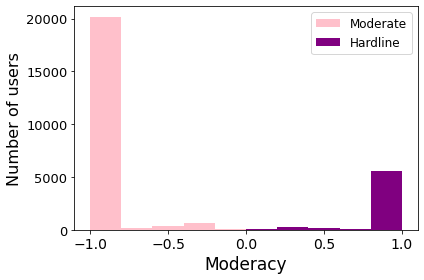

In [17]:
#Nicht gelöschte Tweets
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['moderacy'],'hist_tweetskb_undel_URLs_moderacy_pol')

In [4]:
#Die Anzahl der Hardliner und Moderaten entlang der moderate Achse wird dargestellt.
#Englische Labels
def plot_histogram_kb_de(df, titel):
    
    fig, ax = plt.subplots()
     
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderat')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardliner')
   
          
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Anzahl der Benutzer', fontsize=16)
    ax.set_xlabel(xlabel='Moderate', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/de/'+titel+'.pdf')

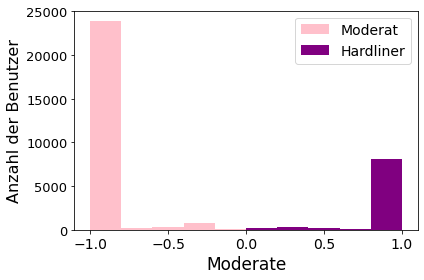

In [5]:
#Alle Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['moderacy'],'hist_tweetskb_URLs_moderacy_pol')

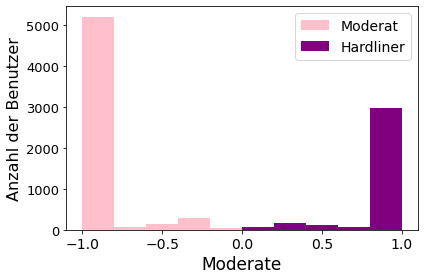

In [6]:
#Gelöschte Tweets
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['moderacy'],'hist_tweetskb_del_URLs_moderacy_pol')

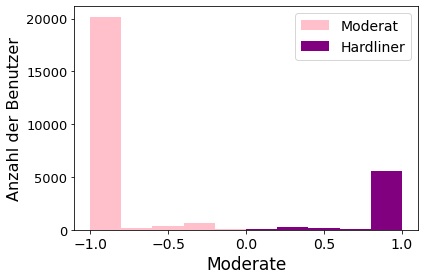

In [7]:
#Nicht gelöschte Tweets
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['moderacy'],'hist_tweetskb_undel_URLs_moderacy_pol')

***

# Hexabin
### Reputation-Polarisierung

***

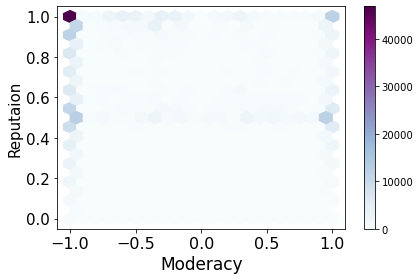

In [15]:
#Die Beziehung zwischen der Reputation der Benutzer und moderate Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten Tweets geachtet. 
df = df_tweetskb[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetsKB_moderacy_reputation_all')

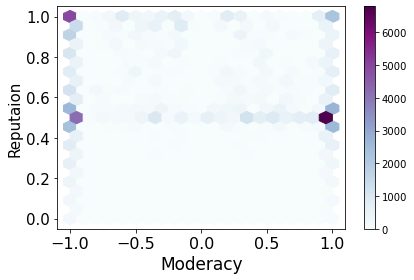

In [16]:
#Gelöschte Tweets
plot_hexbin_reputaion(df_del, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu','Hexabinplot_tweetsKB_del_moderacy_reputation_all')

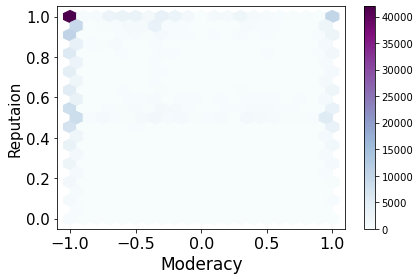

In [17]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion(df_undel, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu','Hexabinplot_tweetsKB_undel_moderacy_reputation_all')

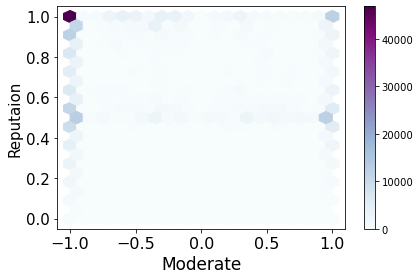

In [49]:
#Die Beziehung zwischen der Reputation der Benutzer und moderate Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten Tweets geachtet. 
#Englische Labels
df = df_tweetskb[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion_de(df, 'is_deleted', 'moderacy', 'Moderate', 'BuPu', 'Hexabinplot_tweetsKB_moderacy_reputation_all')

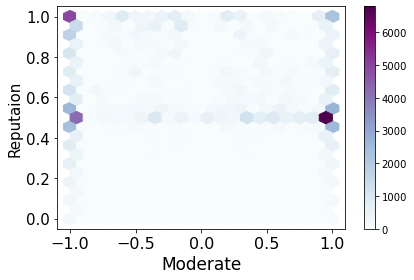

In [50]:
#Gelöschte Tweets
plot_hexbin_reputaion_de(df_del, 'is_deleted', 'moderacy', 'Moderate', 'BuPu','Hexabinplot_tweetsKB_del_moderacy_reputation_all')

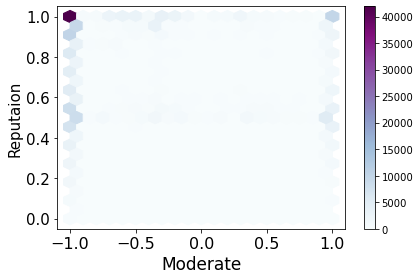

In [51]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion_de(df_undel, 'is_deleted', 'moderacy', 'Moderate', 'BuPu','Hexabinplot_tweetsKB_undel_moderacy_reputation_all')

***

### Löschquote-Polarisierung

***

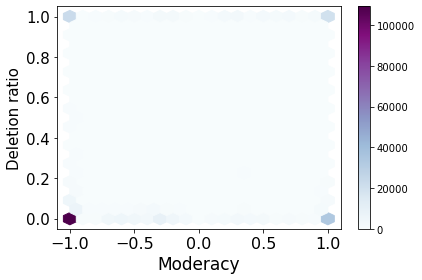

In [18]:
#Die Beziehung zwischen der Löschunsquote der Benutzer mit moderate Polarisierung von denen wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten Tweets geachtet.
#Englische Labels
df = df_tweetskb[['is_deleted', 'moderacy', 'Deletion_ratio']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_deletion_ratio(df, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetsKB_moderacy_deletion_ratio_all')

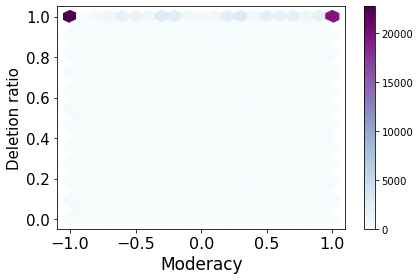

In [19]:
#gelöschte Tweets
plot_hexbin_deletion_ratio(df_del, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_del_tweetsKB_moderacy_deletion_ratio_all')

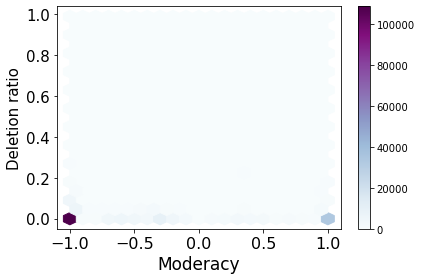

In [20]:
#Nicht gelöschte Tweets
plot_hexbin_deletion_ratio(df_undel, 'is_deleted', 'moderacy', 'Moderacy', 'BuPu', 'Hexabinplot_tweetsKB_undel_moderacy_deletion_ratio_all')